# Predict Bad Loans Using Lending Club Data

### Highlight
### 1. Data cleaning and feature engineering
### 2. Data exploration and visualization
### 3. Pre- Machine Learning data engineering
### 4. Building different models and compare
### 5. Develop a simple neural network and implement the above data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline

## 1. Data cleaning and feature engineering

#### Load data and data dictionary

In [2]:
raw_data = pd.read_csv('./data/loan.csv')
data_dic = pd.read_excel('./data/LCDataDictionary.xlsx', sheetname = 'LoanStats')
pd.set_option('display.max_colwidth', -1)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835922 non-null object
emp_length                     887379 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

#### Drop useless feature and features that more than 90% of entries are NA

In [4]:
data_reduced = raw_data.drop(['id', 'member_id', 'emp_title', 'url', 'title', 'last_pymnt_d', 'next_pymnt_d', 
                              'desc'], axis=1)

data_reduced.dropna(axis=1, thresh=88000, inplace=True)
data_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 49 columns):
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_length                     887379 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status                    887379 non-null object
pymnt_plan                     887379 non-null object
purpose                        887379 non-null object
zip_code           

#### Check the deleted feature to make sure no critical feature are deleted by mistake

In [5]:
full_list_name = list(raw_data)
reduced_list_name = list(data_reduced)
removed_col = np.setdiff1d(full_list_name,reduced_list_name)
data_dic[data_dic['LoanStatNew'].isin(removed_col)]

,LoanStatNew,Description
3,all_util,Balance to credit limit on all trades
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
15,desc,Loan description provided by the borrower
17,dti_joint,"A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income"
20,emp_title,The job title supplied by the Borrower when applying for the loan.*
27,id,A unique LC assigned ID for the loan listing.
28,il_util,Ratio of total current balance to high credit/credit limit on all install acct
30,inq_fi,Number of personal finance inquiries
31,inq_last_12m,Number of credit inquiries in past 12 months
40,last_pymnt_d,Last month payment was received


#### Fill the NA months with a value of 5 years

In [6]:
data_reduced['mths_since_last_delinq'].fillna(value = 120, inplace = True)
data_reduced['mths_since_last_record'].fillna(value = 120, inplace = True)
data_reduced['mths_since_last_major_derog'].fillna(value = 120, inplace = True)
data_reduced['mths_since_last_major_derog'].fillna(value = 120, inplace = True)

data_reduced.dropna(axis=0, how='any', inplace = True)
data_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816673 entries, 42535 to 887378
Data columns (total 49 columns):
loan_amnt                      816673 non-null float64
funded_amnt                    816673 non-null float64
funded_amnt_inv                816673 non-null float64
term                           816673 non-null object
int_rate                       816673 non-null float64
installment                    816673 non-null float64
grade                          816673 non-null object
sub_grade                      816673 non-null object
emp_length                     816673 non-null object
home_ownership                 816673 non-null object
annual_inc                     816673 non-null float64
verification_status            816673 non-null object
issue_d                        816673 non-null object
loan_status                    816673 non-null object
pymnt_plan                     816673 non-null object
purpose                        816673 non-null object
zip_code       

#### Split catagorical and numeric features. Generate correlation matrix for numeric features to remove highly correlated features. 

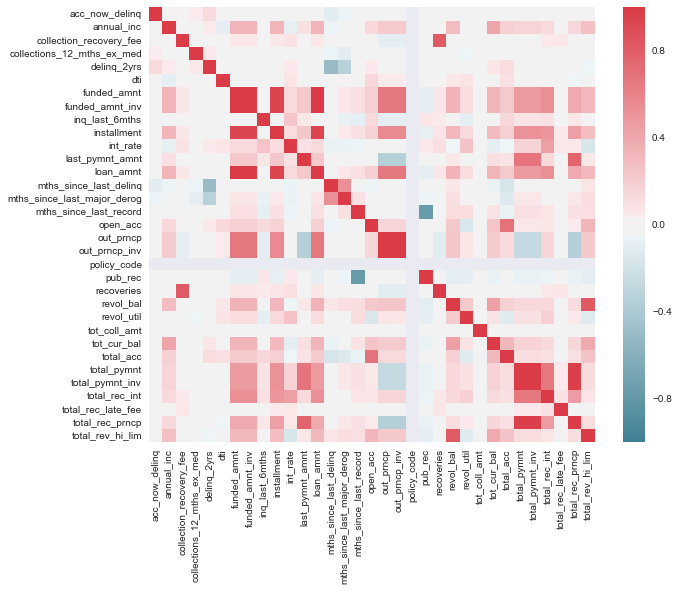

In [7]:
col_list = list(data_reduced)
catagorical_list = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status'
                   'pymnt_plan', 'purpose', 'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status', 
                    'last_credit_pull_d', 'application_type']
numeric_list = np.setdiff1d(col_list, catagorical_list)

data_numeric = data_reduced[numeric_list]
f, ax = plt.subplots(figsize=(10, 8))
corr = data_numeric.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), ax=ax)

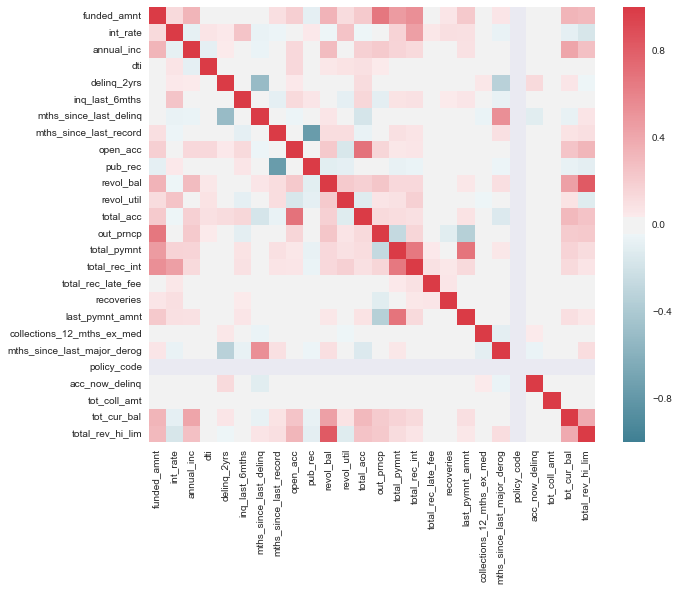

In [8]:
data_reduced.drop(['collection_recovery_fee', 'funded_amnt_inv', 'installment', 'total_pymnt_inv', 'loan_amnt',
                   'total_rec_prncp', 'sub_grade', 'purpose', 'zip_code', 'earliest_cr_line', 'initial_list_status',
                   'application_type', 'out_prncp_inv', 'pymnt_plan'], axis = 1, inplace = True)

col_list = list(data_reduced)

f, ax = plt.subplots(figsize=(10, 8))
corr = data_reduced.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), ax=ax)

#### Final features used in the modeling

In [9]:
data_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816673 entries, 42535 to 887378
Data columns (total 35 columns):
funded_amnt                    816673 non-null float64
term                           816673 non-null object
int_rate                       816673 non-null float64
grade                          816673 non-null object
emp_length                     816673 non-null object
home_ownership                 816673 non-null object
annual_inc                     816673 non-null float64
verification_status            816673 non-null object
issue_d                        816673 non-null object
loan_status                    816673 non-null object
addr_state                     816673 non-null object
dti                            816673 non-null float64
delinq_2yrs                    816673 non-null float64
inq_last_6mths                 816673 non-null float64
mths_since_last_delinq         816673 non-null float64
mths_since_last_record         816673 non-null float64
open_acc     

## 2. Data exploration and visualization

#### Label: Loan Status 

In [10]:
data_reduced['loan_status'].value_counts()

Current               597918
Fully Paid            153923
Charged Off           35201 
Late (31-120 days)    11461 
Issued                8457  
In Grace Period       6185  
Late (16-30 days)     2328  
Default               1200  
Name: loan_status, dtype: int64

In [11]:
def status_label(status):
    if status == 'Fully Paid':
        return 0
    else:
        return 1

filter_mask = data_reduced['loan_status'].isin(['Fully Paid', 'Charged Off', 'Late (31-120 days)', 
                                                'Late (16-30 days)', 'Default'])
data_final = data_reduced[filter_mask]
temp = data_final.copy()
temp['loan_label'] = data_final['loan_status'].apply(status_label)
data_final = temp
data_final.drop('loan_status', axis = 1, inplace=True)

In [12]:
data_final['loan_label'].value_counts()

0    153923
1    50190 
Name: loan_label, dtype: int64

#### Issue Date

In [13]:
data_final['issue_date'] = pd.to_datetime(data_final['issue_d'])
data_final.drop('issue_d', axis = 1, inplace = True)
data_final['issue_month'] = data_final['issue_date'].apply(lambda x: x.to_period('M'))
data_final.head(5)

,funded_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,addr_state,dti,...,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_label,issue_date,issue_month
42538,12000.0,36 months,13.53,B,10+ years,RENT,40000.0,Source Verified,NM,16.94,...,0.0,53.0,1.0,0.0,15386.0,13605.0,8100.0,0,2013-12-01,2013-12
42544,3000.0,36 months,12.85,B,10+ years,RENT,25000.0,Verified,FL,24.68,...,0.0,69.0,1.0,0.0,154.0,19530.0,5300.0,0,2013-12-01,2013-12
42546,28000.0,36 months,7.62,A,5 years,MORTGAGE,325000.0,Source Verified,CA,18.55,...,0.0,120.0,1.0,0.0,0.0,799592.0,54200.0,0,2013-12-01,2013-12
42549,24000.0,36 months,13.53,B,10+ years,MORTGAGE,100000.0,Verified,MI,22.18,...,0.0,120.0,1.0,0.0,539.0,199834.0,28200.0,0,2013-12-01,2013-12
42550,8000.0,36 months,10.99,B,2 years,MORTGAGE,33000.0,Not Verified,CO,15.75,...,0.0,120.0,1.0,0.0,0.0,15949.0,20800.0,1,2013-12-01,2013-12


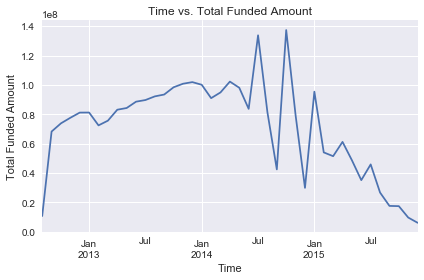

In [14]:
data_group_by_month = data_final[['issue_month', 'funded_amnt']].groupby('issue_month').sum()
data_group_by_month['funded_amnt'].plot()
plt.xlabel('Time')
plt.ylabel('Total Funded Amount')
plt.title('Time vs. Total Funded Amount')
plt.tight_layout()

#### State

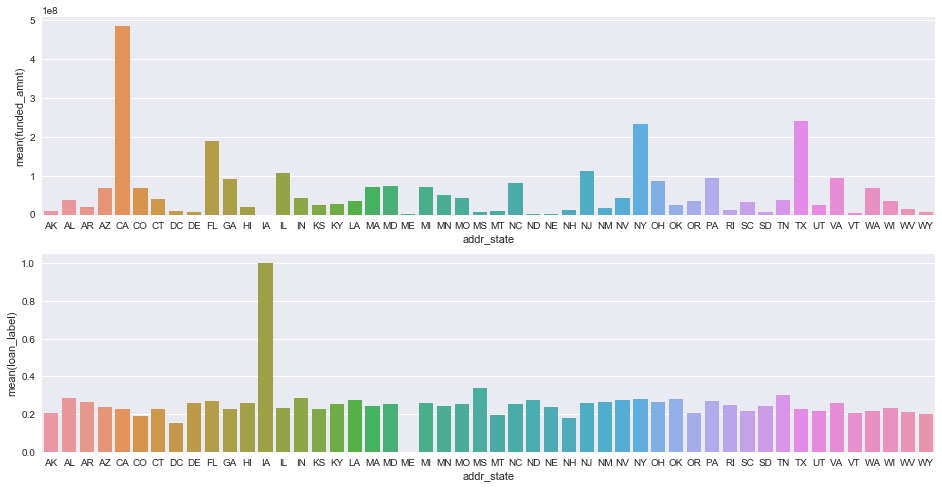

In [15]:
funded_amnt_group_by_state = data_final[['addr_state', 'funded_amnt']].groupby(['addr_state'], as_index = False).sum()
loan_label_group_by_state = data_final[['addr_state', 'loan_label']].groupby(['addr_state'], as_index = False).mean()

f, (ax1, ax2) = plt.subplots(2, 1, sharex=False, figsize = (16, 8))
sns.barplot(ax=ax1, x='addr_state', y='funded_amnt', data=funded_amnt_group_by_state)
sns.barplot(ax=ax2, x='addr_state', y='loan_label', data=loan_label_group_by_state)

#### Term and Grade

In [16]:
data_group_by_grade_term = data_final[['term', 'grade', 'int_rate']].groupby(['term', 'grade']).mean().reset_index()
data_group_by_grade_term.pivot(index='term', columns='grade', values='int_rate')

grade,A,B,C,D,E,F,G
term,,,,,,,
36 months,7.548021,11.582149,14.622489,17.795392,20.556489,24.019675,26.069375
60 months,8.557269,11.417472,14.960791,17.679377,20.737113,24.011227,25.859587


In [17]:
loan_label_group_by_grade_term = data_final[['term', 'grade', 'loan_label']].groupby(['term', 'grade']).mean().reset_index()
loan_label_group_by_grade_term.pivot(index='term', columns='grade', values='loan_label')

grade,A,B,C,D,E,F,G
term,,,,,,,
36 months,0.082167,0.158197,0.24294,0.318228,0.394697,0.462252,0.513889
60 months,0.126882,0.201595,0.30056,0.382023,0.433964,0.467410,0.510613


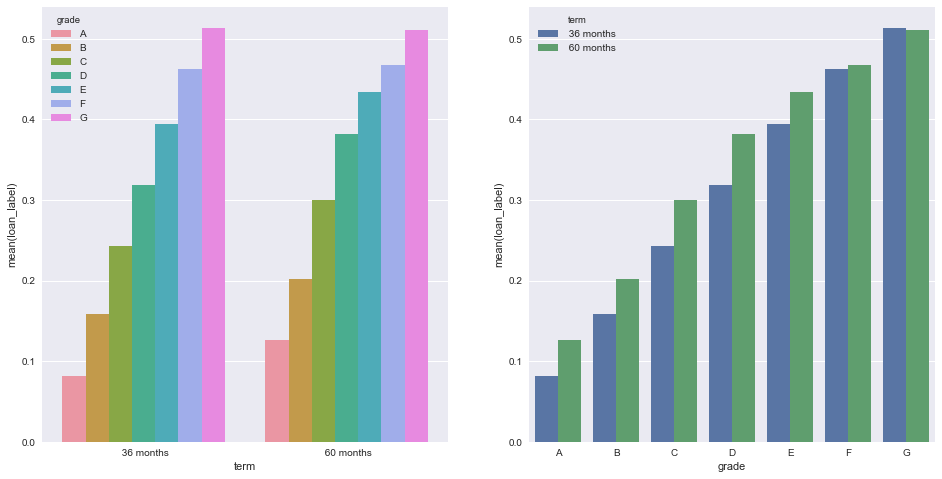

In [18]:
f, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize = (16, 8))
sns.barplot(ax=ax1, x='term', y='loan_label', hue='grade', data=loan_label_group_by_grade_term)
sns.barplot(ax=ax2, x='grade', y='loan_label', hue='term', data=loan_label_group_by_grade_term)

#### Employment length

In [19]:
def proc_emp_length(emp_length_val):
    if emp_length_val == '< 1 year' or emp_length_val == 'n/a':
        emp_length_feat = 0.5
    elif emp_length_val == '10+ years':
        emp_length_feat = 10
    else:
        emp_length_feat = float(emp_length_val.rstrip(' years'))
    return emp_length_feat

temp = data_final.copy()
temp['employment_length'] = data_final['emp_length'].apply(proc_emp_length)
data_final = temp
data_final.drop('emp_length', axis = 1, inplace=True)

(0.2, 0.3)

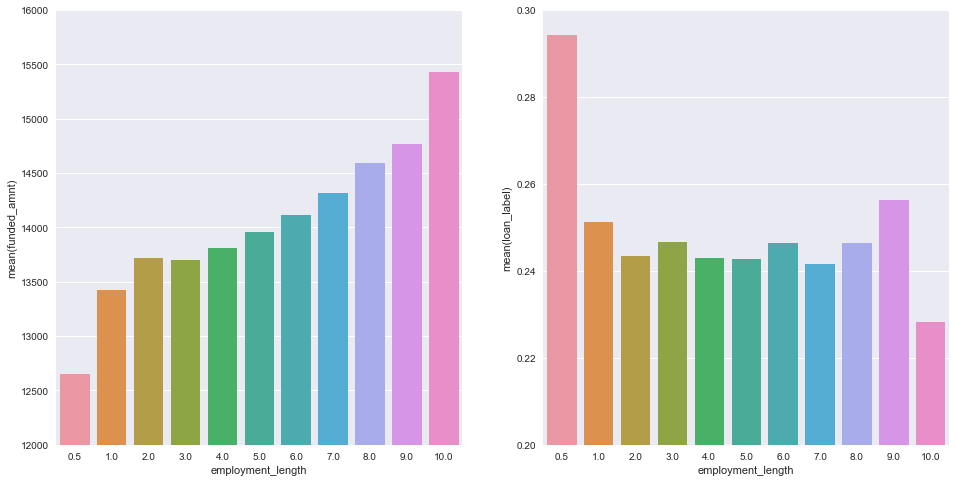

In [20]:
loan_label_group_by_emp_length = data_final[['employment_length', 'loan_label']].groupby(['employment_length'], 
                                                                                         as_index = False).mean()
funded_amnt_group_by_emp_length = data_final[['employment_length', 'funded_amnt']].groupby(['employment_length'], 
                                                                                         as_index = False).mean()

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 8))
sns.barplot(ax=ax1, x='employment_length', y='funded_amnt', data=funded_amnt_group_by_emp_length)
sns.barplot(ax=ax2, x='employment_length', y='loan_label', data=loan_label_group_by_emp_length)

ax1.set_ylim([12000, 16000])
ax2.set_ylim([0.2, 0.3])

#### Funded amount and Annual income

In [21]:
data_final['norm_funded_amnt'] = data_final['funded_amnt']/data_final['annual_inc']
data_final.head(5)

,funded_amnt,term,int_rate,grade,home_ownership,annual_inc,verification_status,addr_state,dti,delinq_2yrs,...,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_label,issue_date,issue_month,employment_length,norm_funded_amnt
42538,12000.0,36 months,13.53,B,RENT,40000.0,Source Verified,NM,16.94,0.0,...,1.0,0.0,15386.0,13605.0,8100.0,0,2013-12-01,2013-12,10.0,0.300000
42544,3000.0,36 months,12.85,B,RENT,25000.0,Verified,FL,24.68,0.0,...,1.0,0.0,154.0,19530.0,5300.0,0,2013-12-01,2013-12,10.0,0.120000
42546,28000.0,36 months,7.62,A,MORTGAGE,325000.0,Source Verified,CA,18.55,0.0,...,1.0,0.0,0.0,799592.0,54200.0,0,2013-12-01,2013-12,5.0,0.086154
42549,24000.0,36 months,13.53,B,MORTGAGE,100000.0,Verified,MI,22.18,0.0,...,1.0,0.0,539.0,199834.0,28200.0,0,2013-12-01,2013-12,10.0,0.240000
42550,8000.0,36 months,10.99,B,MORTGAGE,33000.0,Not Verified,CO,15.75,0.0,...,1.0,0.0,0.0,15949.0,20800.0,1,2013-12-01,2013-12,2.0,0.242424


(0, 200000.0)

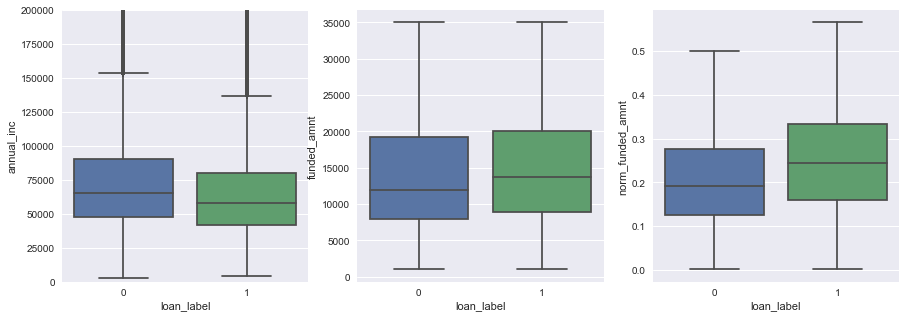

In [22]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 5))
sns.boxplot(ax=ax1, x='loan_label', y='annual_inc', data=data_final[['loan_label', 'annual_inc']])
sns.boxplot(ax=ax2, x='loan_label', y='funded_amnt', data=data_final[['loan_label', 'funded_amnt']])
sns.boxplot(ax=ax3, x='loan_label', y='norm_funded_amnt', data=data_final[['loan_label', 'norm_funded_amnt']])

ax1.set_ylim([0, 0.02e7])

#### Home ownership

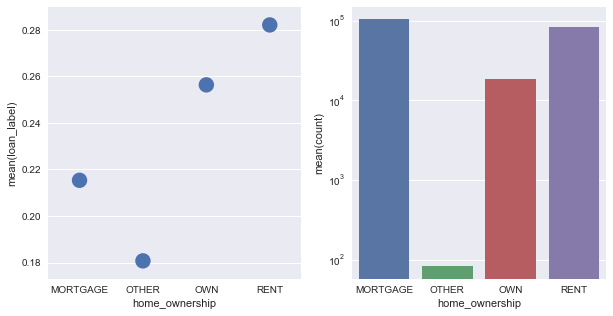

In [23]:
data_final['home_ownership'].replace('ANY', 'OTHER', inplace=True)
data_final['home_ownership'].replace('NONE', 'OTHER', inplace=True)

data_group_by_home = data_final[['home_ownership', 'loan_label']].groupby('home_ownership').mean()
data_group_by_home['count'] = data_final[['home_ownership', 'loan_label']].groupby('home_ownership').count()
data_group_by_home.reset_index(inplace = True)

f, (ag1, ag2) = plt.subplots(1, 2, figsize = (10, 5))
sns.pointplot(ax = ag1, x = 'home_ownership', y = 'loan_label', data = data_group_by_home, join = False, scale = 1.5)
sns.barplot(ax = ag2, x = 'home_ownership', y = 'count', data = data_group_by_home)

ag2.set_yscale('log')

#### Verification Status

In [24]:
data_final['verification_status'].value_counts()

Verified           77811
Source Verified    63535
Not Verified       62767
Name: verification_status, dtype: int64

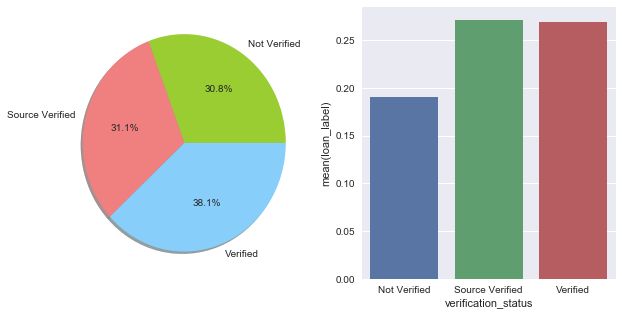

In [25]:
data_group_by_verification = data_final[['verification_status', 'loan_label']].groupby('verification_status', 
                                                                                       as_index = False).count()

label_group_by_verification = data_final[['verification_status', 'loan_label']].groupby('verification_status', 
                                                                                       as_index = False).mean()

labels = data_group_by_verification['verification_status'].tolist()
sizes = data_group_by_verification['loan_label'].tolist()
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']
          
f, (ap1, ap2) = plt.subplots(1, 2, figsize = (10, 5))
          
ap1.pie(sizes, labels = labels, colors = colors, autopct = '%1.1f%%', shadow = True)
sns.barplot(ax = ap2, x = 'verification_status', y = 'loan_label', data = label_group_by_verification)

## 3. Pre- Machine Learning data engineering

In [26]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204113 entries, 42538 to 887371
Data columns (total 37 columns):
funded_amnt                    204113 non-null float64
term                           204113 non-null object
int_rate                       204113 non-null float64
grade                          204113 non-null object
home_ownership                 204113 non-null object
annual_inc                     204113 non-null float64
verification_status            204113 non-null object
addr_state                     204113 non-null object
dti                            204113 non-null float64
delinq_2yrs                    204113 non-null float64
inq_last_6mths                 204113 non-null float64
mths_since_last_delinq         204113 non-null float64
mths_since_last_record         204113 non-null float64
open_acc                       204113 non-null float64
pub_rec                        204113 non-null float64
revol_bal                      204113 non-null float64
revol_util

#### For simplicity, choose the features we have explored above

In [27]:
numeric_col = ['funded_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'mths_since_last_delinq', 
                'mths_since_last_record', 'employment_length', 'norm_funded_amnt']
categorical_col = ['term', 'grade', 'home_ownership', 'verification_status', 'addr_state']
label_col = ['loan_label']

numeric_short = data_final[numeric_col].values
categorical_short = data_final[categorical_col].values

In [28]:
print('Numeric features number: ' + str(numeric_short.shape[1]))
print('Categorical features number: ' + str(categorical_short.shape[1]))
print('Total data points: ' + str(numeric_short.shape[0]))

Numeric features number: 9
Categorical features number: 5
Total data points: 204113


#### Method 1: Use OnehotEncoder to trasform the data into numpy array

In [29]:
X = numeric_short
y = data_final[label_col].values

for n in range(categorical_short.shape[1]):
    label_enc = preprocessing.LabelEncoder()
    label_val = label_enc.fit_transform(categorical_short[:,n])
    label_val = label_val.reshape(-1, 1)

    onehot_enc = preprocessing.OneHotEncoder()
    category_temp = onehot_enc.fit_transform(label_val)
    category_temp = category_temp.toarray()
    
    X = np.hstack((X, category_temp))

In [30]:
X.shape

(204113, 75)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0/3, random_state=42)

#### Method 2: Use get_dummies to keep the data as pandas dataframe

In [32]:
X_df = data_final[categorical_col + numeric_col]

In [33]:
X_df.head(5)

,term,grade,home_ownership,verification_status,addr_state,funded_amnt,int_rate,annual_inc,dti,delinq_2yrs,mths_since_last_delinq,mths_since_last_record,employment_length,norm_funded_amnt
42538,36 months,B,RENT,Source Verified,NM,12000.0,13.53,40000.0,16.94,0.0,53.0,33.0,10.0,0.300000
42544,36 months,B,RENT,Verified,FL,3000.0,12.85,25000.0,24.68,0.0,58.0,53.0,10.0,0.120000
42546,36 months,A,MORTGAGE,Source Verified,CA,28000.0,7.62,325000.0,18.55,0.0,120.0,120.0,5.0,0.086154
42549,36 months,B,MORTGAGE,Verified,MI,24000.0,13.53,100000.0,22.18,0.0,120.0,120.0,10.0,0.240000
42550,36 months,B,MORTGAGE,Not Verified,CO,8000.0,10.99,33000.0,15.75,0.0,120.0,104.0,2.0,0.242424


In [34]:
for feature in categorical_col:
    
    X_df_temp = pd.get_dummies(X_df[feature])
    X_df = X_df.merge(X_df_temp, left_index = True, right_index = True)
    X_df.drop(feature, axis = 1, inplace = True)
y_df = data_final[label_col]

In [35]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204113 entries, 42538 to 887371
Data columns (total 75 columns):
funded_amnt               204113 non-null float64
int_rate                  204113 non-null float64
annual_inc                204113 non-null float64
dti                       204113 non-null float64
delinq_2yrs               204113 non-null float64
mths_since_last_delinq    204113 non-null float64
mths_since_last_record    204113 non-null float64
employment_length         204113 non-null float64
norm_funded_amnt          204113 non-null float64
 36 months                204113 non-null uint8
 60 months                204113 non-null uint8
A                         204113 non-null uint8
B                         204113 non-null uint8
C                         204113 non-null uint8
D                         204113 non-null uint8
E                         204113 non-null uint8
F                         204113 non-null uint8
G                         204113 non-null uint8
MOR

## 4. Building different models and compare

#### Logistic Regression with original data

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

lr_model = LogisticRegression()
parameters = {'C': [0.1, 1, 10]}

acc_scorer = metrics.make_scorer(metrics.accuracy_score)

grid_obj = GridSearchCV(lr_model, param_grid = parameters, scoring = acc_scorer, cv = 10)
grid_obj = grid_obj.fit(X_train, y_train[:,0])

lr_model = grid_obj.best_estimator_

lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

accuracy = metrics.accuracy_score(y_pred, y_test)
precision = metrics.precision_score(y_pred, y_test, pos_label=1)
recall = metrics.recall_score(y_pred, y_test, pos_label=1)

print("Best parameters set for Logistic Regression found as follows:")
print()
print(grid_obj.best_estimator_)
print()
#print("Grid scores:")
#for params, mean_score, scores in grid_obj.grid_scores_:
#    print("%0.3f (+/-%0.03f) for %r"
#            % (mean_score, scores.std() / 2, params))
#print()

print('accuracy = ' + str(accuracy))
print('precision = ' + str(precision))
print('recall = ' + str(recall))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best parameters set for Logistic Regression found as follows:

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Grid scores:
0.750 (+/-0.001) for {'C': 0.1}
0.750 (+/-0.001) for {'C': 1}
0.751 (+/-0.001) for {'C': 10}

accuracy = 0.7502131162
precision = 0.0289638698119
recall = 0.397540983607


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


#### Find the very low precision, which is due to the imblanced data. Use SMOTE to re-blance the data

In [37]:
from imblearn.over_sampling import SMOTE

n_sample = y.shape[0]
n_pos_sample = y[y == 1].shape[0]
n_neg_sample = y[y == 0].shape[0]
print('Sample size：{}; Positive sample: {:.2%}; Negative sample: {:.2%}'.format(n_sample, 
                                                                            float(n_pos_sample) / float(n_sample), 
                                                                            float(n_neg_sample) / float(n_sample)))

sm = SMOTE(random_state=42)
X, y = sm.fit_sample(X, y)
print('Use SMOTE method to re-balance positive and negative samples')
n_sample = y.shape[0]
n_pos_sample = y[y == 1].shape[0]
n_neg_sample = y[y == 0].shape[0]
print('Sample size：{}; Positive sample: {:.2%}; Negative sample: {:.2%}'.format(n_sample, 
                                                                            float(n_pos_sample) / float(n_sample), 
                                                                            float(n_neg_sample) / float(n_sample)))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0/3, random_state=42)

Sample size：204113; Positive sample: 24.59%; Negative sample: 75.41%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Use SMOTE method to re-balance positive and negative samples
Sample size：307846; Positive sample: 50.00%; Negative sample: 50.00%


#### Run the same Logistic Regression modeling again with the re-blanced data and see difference from the model from original data

In [38]:
lr_model = LogisticRegression()
parameters = {'C': [0.1, 1, 10]}

acc_scorer = metrics.make_scorer(metrics.accuracy_score)

grid_obj = GridSearchCV(lr_model, param_grid = parameters, scoring = acc_scorer, cv = 10)
grid_obj = grid_obj.fit(X_train, y_train)

lr_model = grid_obj.best_estimator_

lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

accuracy = metrics.accuracy_score(y_pred, y_test)
precision = metrics.precision_score(y_pred, y_test, pos_label=1)
recall = metrics.recall_score(y_pred, y_test, pos_label=1)

print("Best parameters set for Logistic Regression found as follows:")
print()
print(grid_obj.best_estimator_)
#print()
#print("Grid scores:")
#for params, mean_score, scores in grid_obj.grid_scores_:
#    print("%0.3f (+/-%0.03f) for %r"
#            % (mean_score, scores.std() / 2, params))
print()

print('accuracy = ' + str(accuracy))
print('precision = ' + str(precision))
print('recall = ' + str(recall))

Best parameters set for Logistic Regression found as follows:

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Grid scores:
0.633 (+/-0.001) for {'C': 0.1}
0.633 (+/-0.001) for {'C': 1}
0.633 (+/-0.001) for {'C': 10}

accuracy = 0.629775083808
precision = 0.661249414703
recall = 0.621650373251


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [39]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [3, 5, 7], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }

acc_scorer = metrics.make_scorer(metrics.accuracy_score)

grid_obj = GridSearchCV(rf_model, param_grid = parameters, scoring = acc_scorer, cv = 10)
grid_obj = grid_obj.fit(X_train, y_train)

rf_model = grid_obj.best_estimator_

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

accuracy = metrics.accuracy_score(y_pred, y_test)
precision = metrics.precision_score(y_pred, y_test, pos_label=1)
recall = metrics.recall_score(y_pred, y_test, pos_label=1)

print("Best parameters set for Random Forest found as follows:")
print()
print(grid_obj.best_estimator_)

#print()
#print("Grid scores:")
#for params, mean_score, scores in grid_obj.grid_scores_:
#    print("%0.3f (+/-%0.03f) for %r"
#            % (mean_score, scores.std() / 2, params))
print()

print('accuracy = ' + str(accuracy))
print('precision = ' + str(precision))
print('recall = ' + str(recall))


Best parameters set for Random Forest found as follows:
()
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
()
accuracy = 0.801220082638
precision = 0.747034493523
recall = 0.837452429902


In [40]:
from sklearn import tree

i_tree = 0
for tree_in_forest in rf_model.estimators_:
    with open('tree_' + str(i_tree) + '.dot', 'w') as my_file:
        my_file = tree.export_graphviz(tree_in_forest, out_file = my_file)
    i_tree = i_tree + 1

In [42]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()

parameters={'max_depth': [5], 
            'subsample': [0.5],
            'colsample_bytree': [0.5],
            'n_estimators': [100],
            'reg_alpha': [0.02]
           }

acc_scorer = metrics.make_scorer(metrics.accuracy_score)

grid_obj = GridSearchCV(xgb_model, param_grid = parameters, scoring = acc_scorer, cv = 10)
grid_obj = grid_obj.fit(X_train, y_train)

xgb_model = grid_obj.best_estimator_

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

accuracy = metrics.accuracy_score(y_pred, y_test)
precision = metrics.precision_score(y_pred, y_test, pos_label=1)
recall = metrics.recall_score(y_pred, y_test, pos_label=1)

print("Best parameters set for Random Forest found as follows:")
print()
print(grid_obj.best_estimator_)

#print()
#print("Grid scores:")
#for params, mean_score, scores in grid_obj.grid_scores_:
#    print("%0.3f (+/-%0.03f) for %r"
#            % (mean_score, scores.std() / 2, params))
print()

print('accuracy = ' + str(accuracy))
print('precision = ' + str(precision))
print('recall = ' + str(recall))

Best parameters set for Random Forest found as follows:

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.5,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0.02, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.5)

accuracy = 0.836438761986
precision = 0.712462931169
recall = 0.946945337621


## 5. Develop a simple neural network and implement the above data

In [114]:
min_max_scaler = preprocessing.MinMaxScaler()

X_train_new = min_max_scaler.fit_transform(X_train)
y_train_new = min_max_scaler.fit_transform(y_train)
X_test_new = min_max_scaler.fit_transform(X_test)
y_test_new = min_max_scaler.fit_transform(y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


In [100]:
import scipy as sp

class neural_net:
    
    def __init__(self, num_input, num_hidden, num_output, learningRate, threshold):
        
        self.num_input = num_input
        self.num_hidden = num_hidden
        self.num_output = num_output
        self.learningRate = learningRate
        self.threshold = threshold
        
        self.w_hidden = np.random.normal(0.0, pow(self.num_input, -0.5), (self.num_input, self.num_hidden))
        self.w_output = np.random.normal(0.0, pow(self.num_hidden, -0.5), (self.num_hidden, self.num_output))
        
        self.activationFunc = lambda x: sp.special.expit(x) #sigmoid function
        
    def train(self, train_input, train_output): 
        
        train_input = train_input.reshape((1, self.num_input))
        train_output = train_output.reshape((1,self.num_output))
        
        #print('w_hidden: {val}'.format(val = self.w_hidden))
        #print('w_output: {val}'.format(val = self.w_output.T))
        #print('w_hidden: {dim}'.format(dim = self.w_hidden.shape))
        #print('w_output: {dim}'.format(dim = self.w_output.shape))
        
        hidden = np.dot(train_input, self.w_hidden)
        hidden = hidden.reshape((self.num_output, self.num_hidden))
        hiddenOutput = self.activationFunc(hidden)
        #print('hiddenOutput: {dim}'.format(dim = hiddenOutput.shape))
        
        final = np.dot(hiddenOutput, self.w_output)
        finalOutput = self.activationFunc(final)
        #print('finalOutput: {dim}'.format(dim = finalOutput.shape))
        
        
        errorsOutput = train_output - finalOutput
        errorsHidden = np.dot(errorsOutput, self.w_output.T)
        
        self.w_output += self.learningRate*np.dot(hiddenOutput.T, errorsOutput*finalOutput*(1 - finalOutput))
        self.w_hidden += self.learningRate*np.dot(train_input.T, errorsHidden*hiddenOutput*(1 - hiddenOutput))
        
        return
    
    def predict(self, test_input):
        
        hidden = np.dot(test_input, self.w_hidden)
        hiddenOutput = self.activationFunc(hidden)
        
        final = np.dot(hiddenOutput, self.w_output)
        finalOutput = self.activationFunc(final)
        
        if finalOutput >= self.threshold:
            prediction = 1
        else:
            prediction = 0
        
        return prediction
    
    def accu_rate(self, test_input_list, test_target_list):
        
        sampleSize = test_input_list.shape[0]
        predictResult = []
        for i in range(sampleSize):
            predictResult.append(self.predict(test_input_list[i]))
        
        predictResult = np.array(predictResult).reshape(len(test_target_list), 1)
        #print(predictResult.shape)
        #print(test_target_list.shape)
        
        compare = np.abs(predictResult - test_target_list)
        accu = 1 - (np.sum(compare)/sampleSize)
        
        return accu

Threshold = 0.31 ==> Accuracy = 0.6840883035950498
Threshold = 0.32 ==> Accuracy = 0.6940239278050502
Threshold = 0.35 ==> Accuracy = 0.7171580587318851
Threshold = 0.36 ==> Accuracy = 0.7227137775948734
Threshold = 0.38 ==> Accuracy = 0.7347511684646815
Threshold = 0.4 ==> Accuracy = 0.74229107263588
Threshold = 0.5 ==> Accuracy = 0.7587818571974485
Threshold = 0.52 ==> Accuracy = 0.7585760898321526
Threshold = 0.55 ==> Accuracy = 0.7578559040536171
Threshold = 0.58 ==> Accuracy = 0.7565919045239425
Threshold = 0.6 ==> Accuracy = 0.7560039977659543
Threshold = 0.65 ==> Accuracy = 0.7545930215467826
Threshold = 0.7 ==> Accuracy = 0.7540345101266939
Threshold = 0.8 ==> Accuracy = 0.7538875334371968


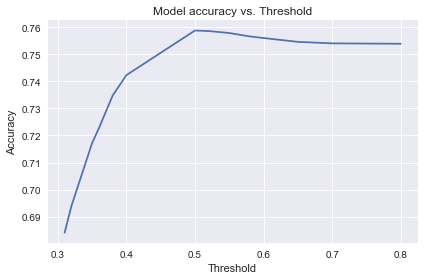

In [117]:
inputNode = 75
hiddenNode = 200
outputNode = 1
learningRate = 0.1
threshold_list = [0.31, 0.32, 0.35, 0.36, 0.38, 0.4, 0.5, 0.52, 0.55, 0.58, 0.6, 0.65, 0.7, 0.8]

accuracy = []
for t in threshold_list:
    nn_model = neural_net(inputNode, hiddenNode, outputNode, learningRate, t)
    
    for i in range(X_train_new.shape[0]):
        nn_model.train(X_train_new[i], y_train[i])
        
    accuResult = nn_model.accu_rate(X_test_new, y_test)
    accuracy.append(accuResult)
    
    print('Threshold = {thre} ==> Accuracy = {acc}'.format(thre = t, acc = accuResult))
    

plt.plot(threshold_list, accuracy)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Model accuracy vs. Threshold')
plt.tight_layout()